#Neural Network Classification - Multi-Output

In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tensorflow Notes/datasets/H1N1_Flu_Vaccines.csv')

In [ ]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [ ]:
df.drop("respondent_id", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [ ]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

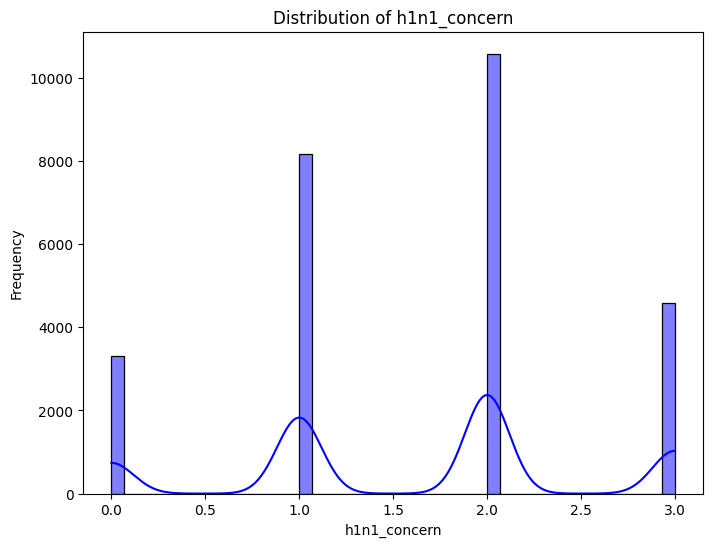

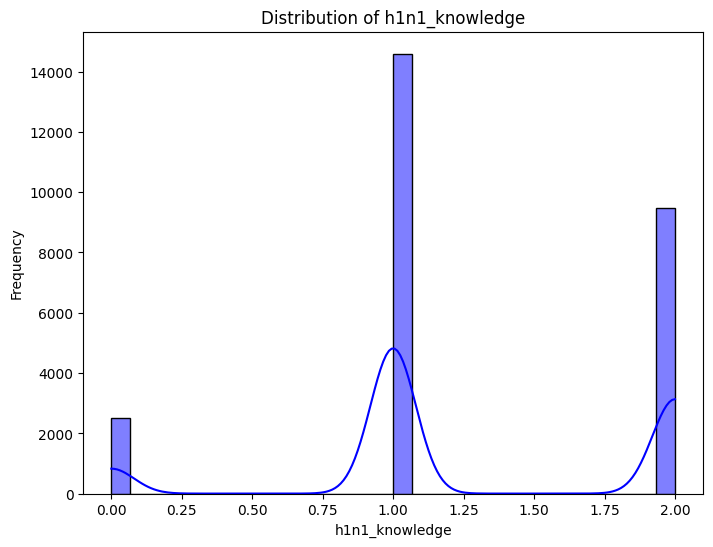

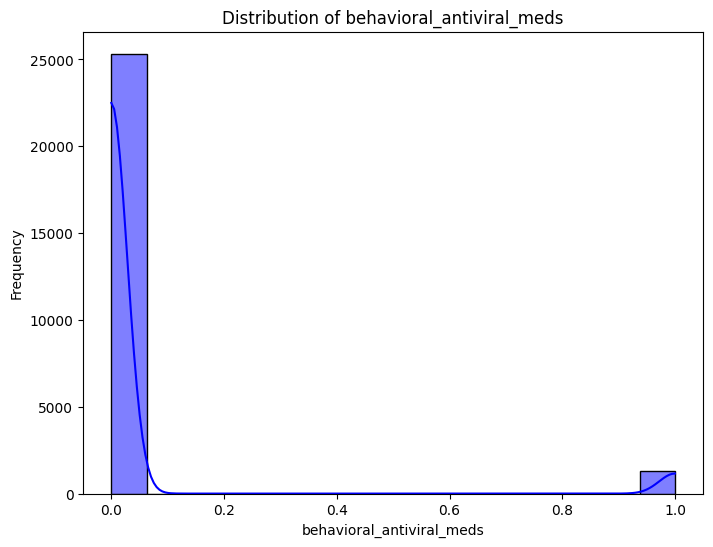

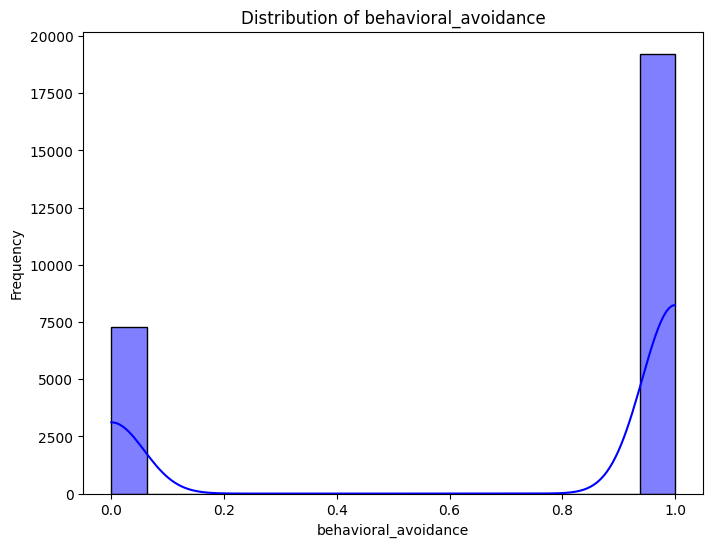

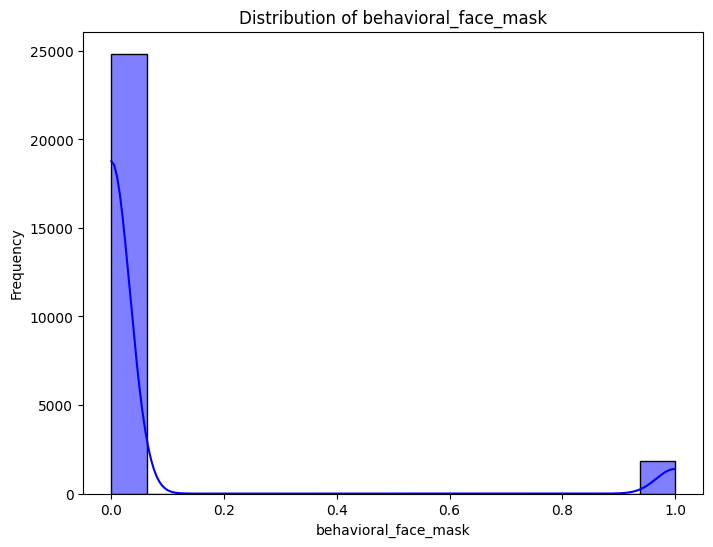

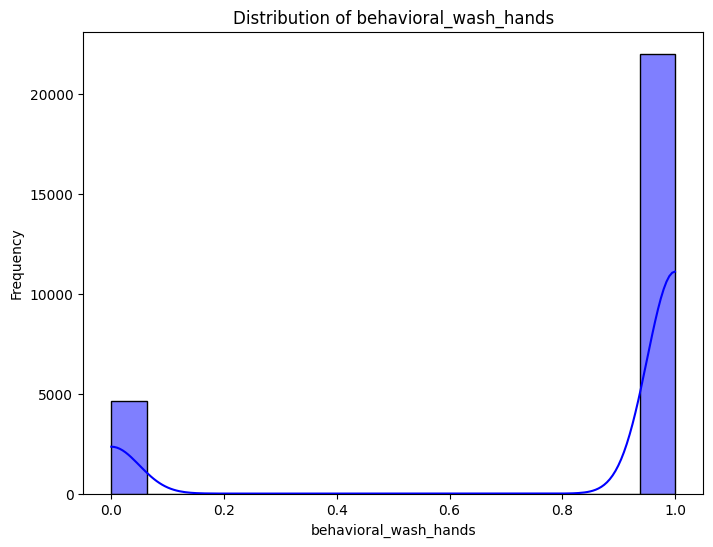

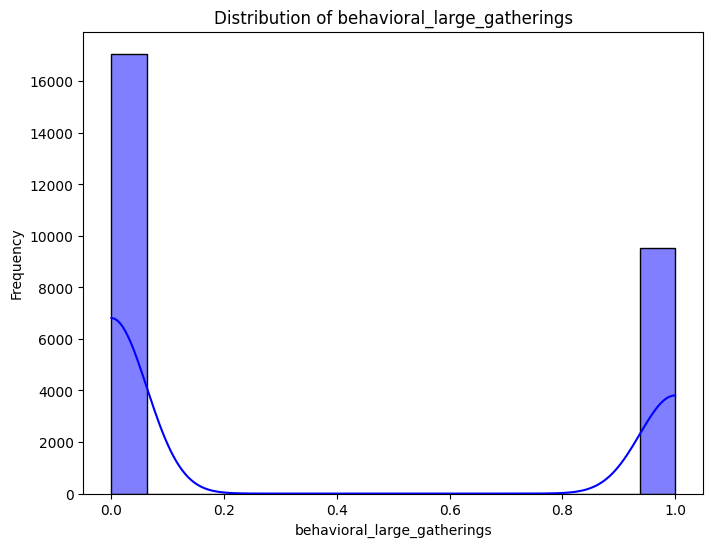

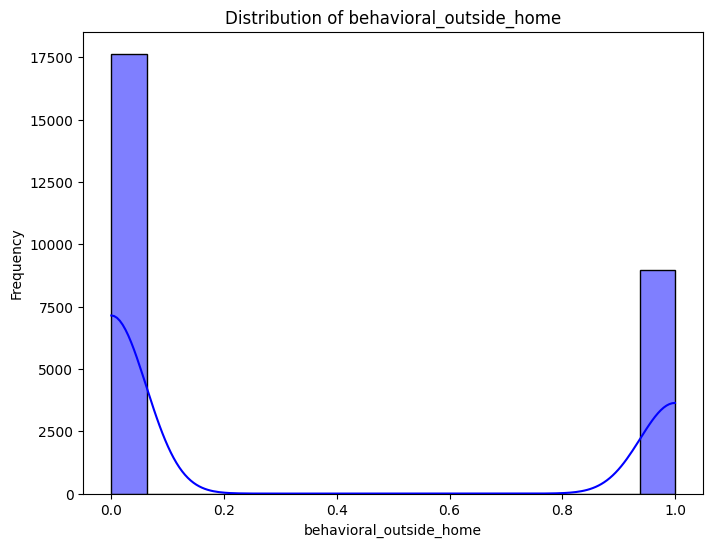

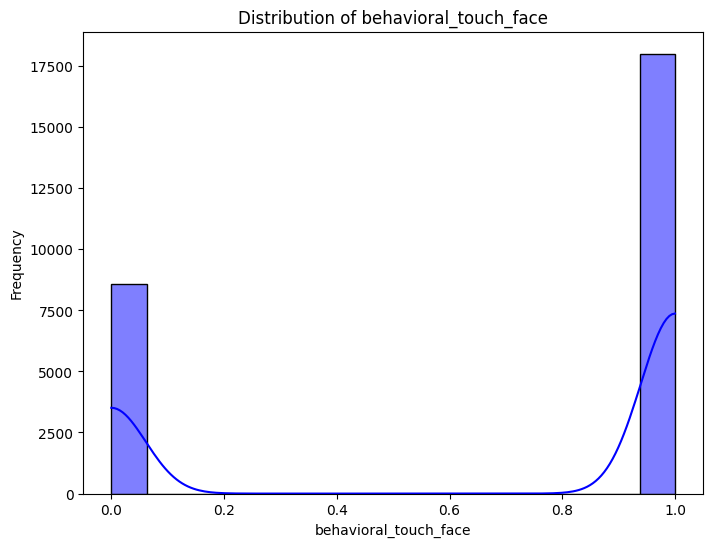

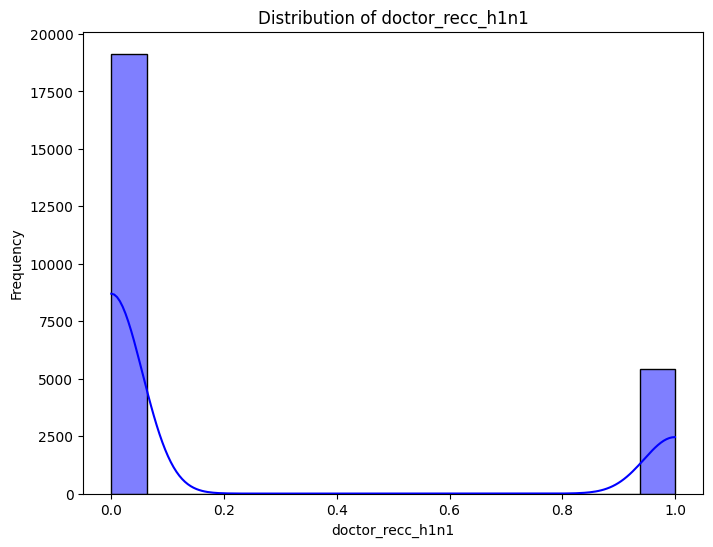

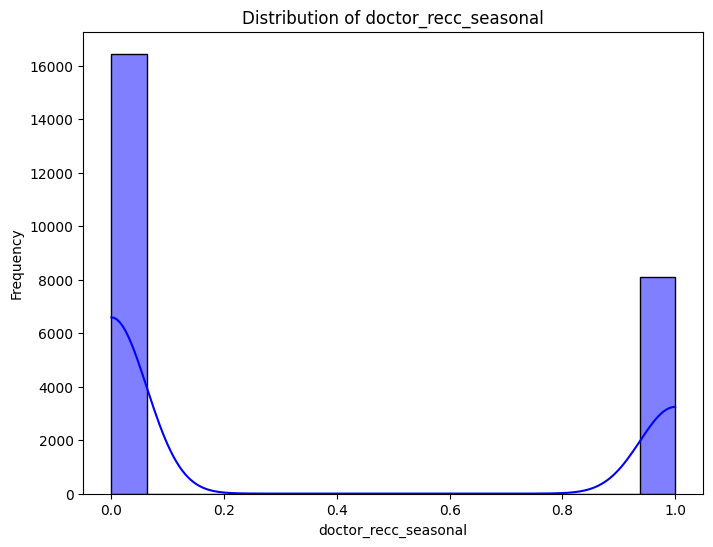

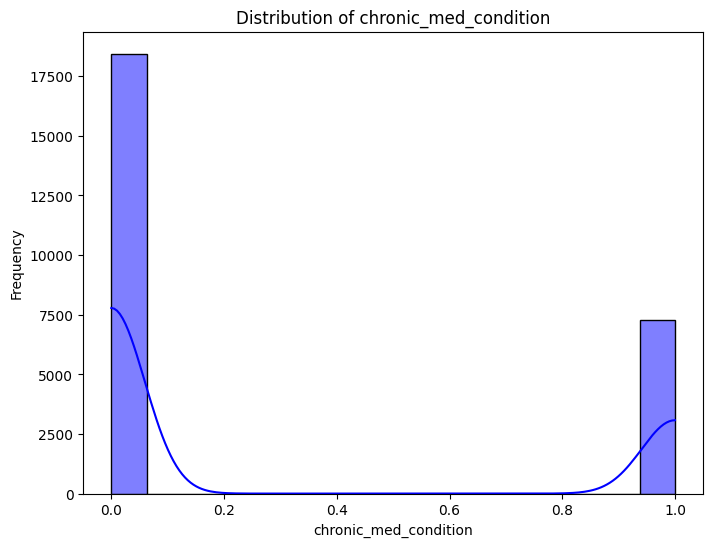

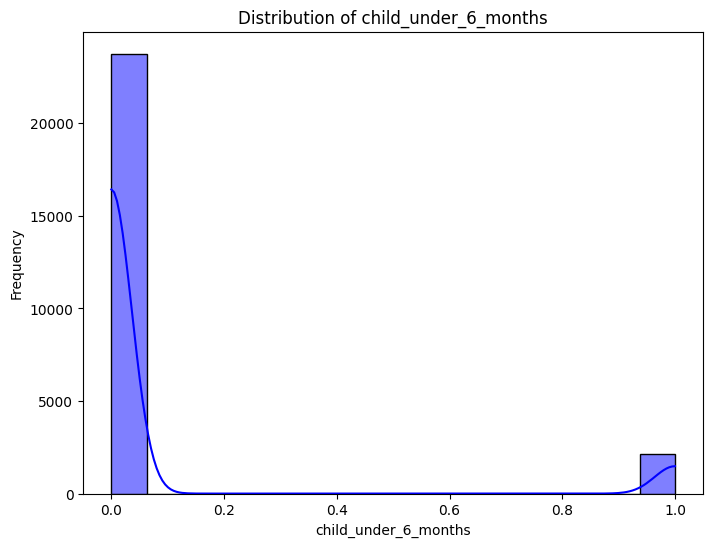

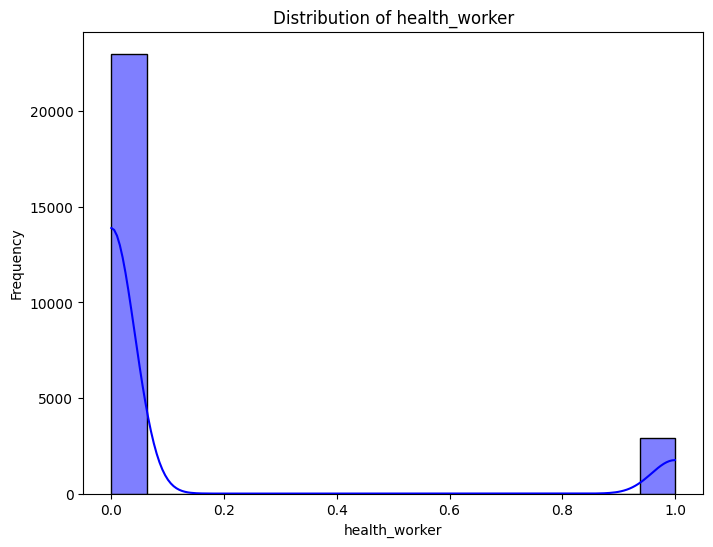

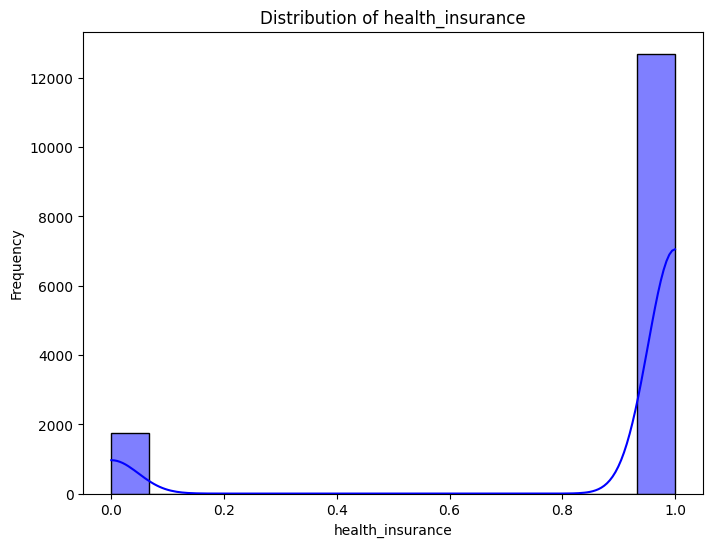

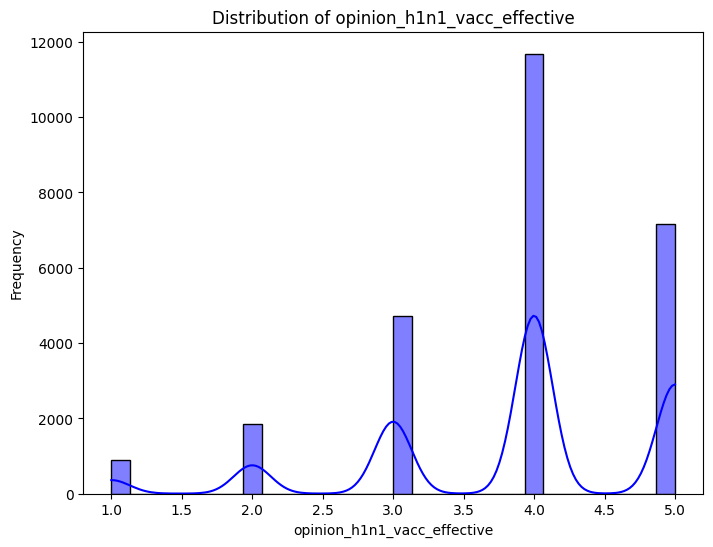

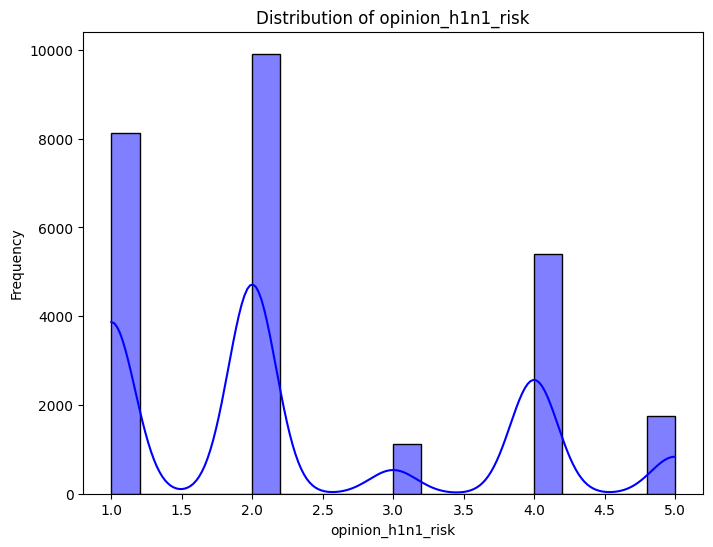

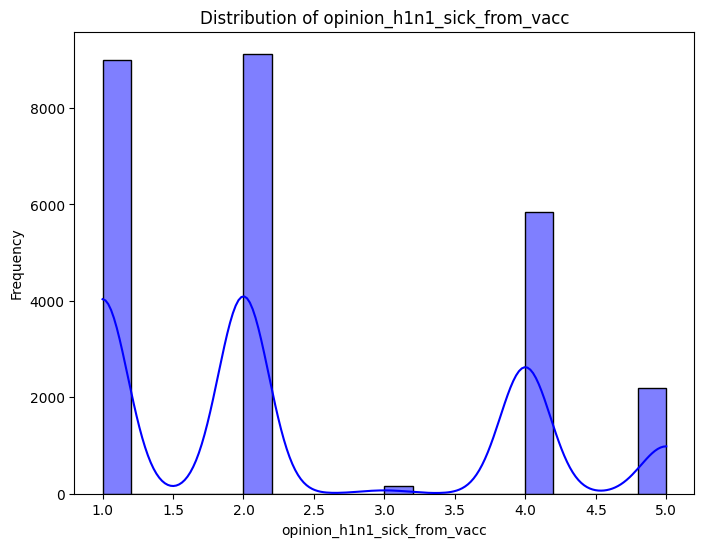

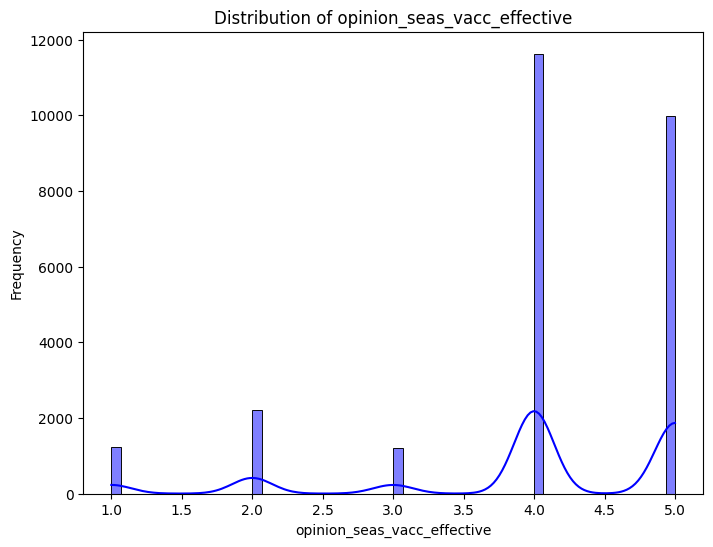

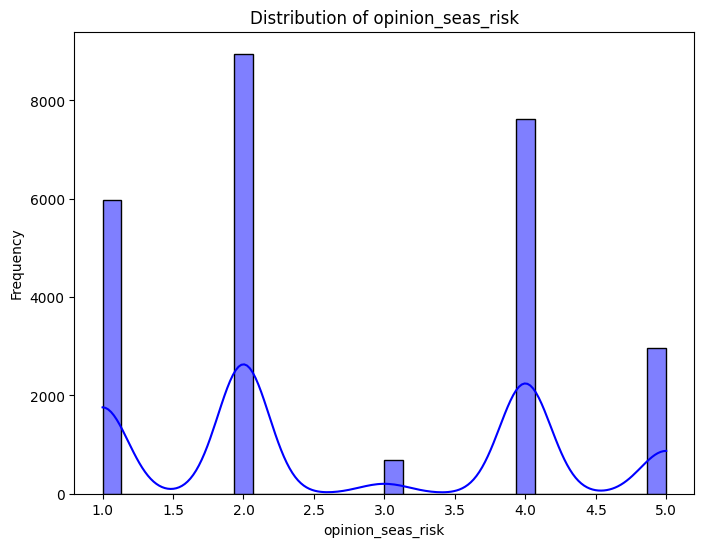

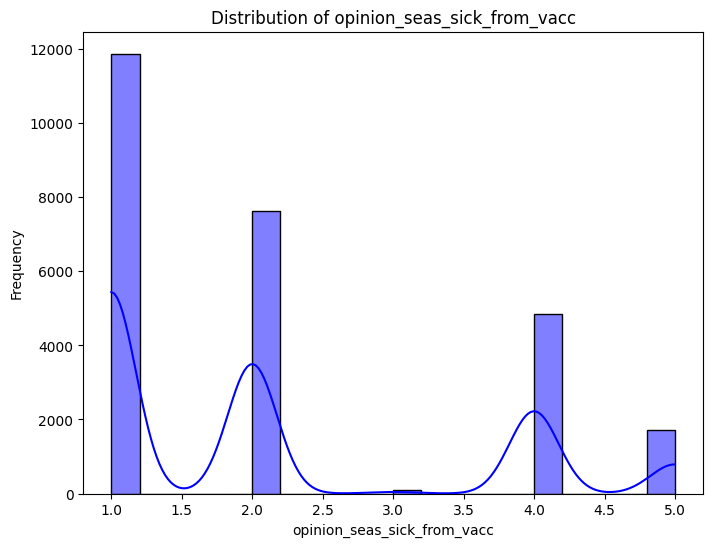

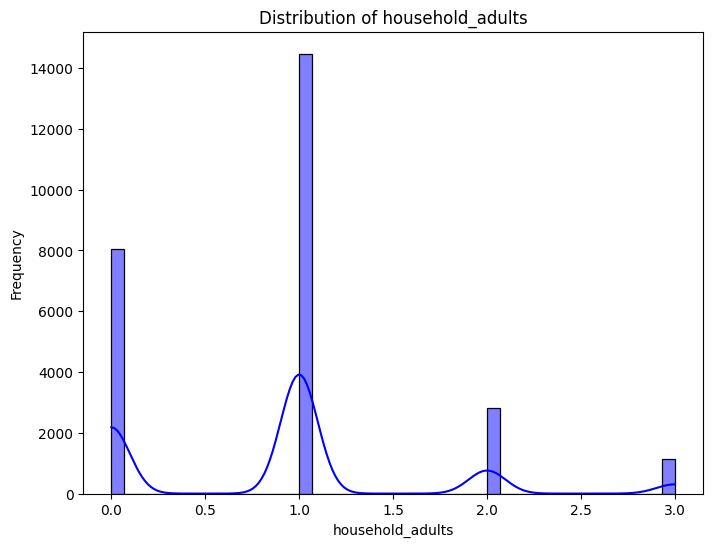

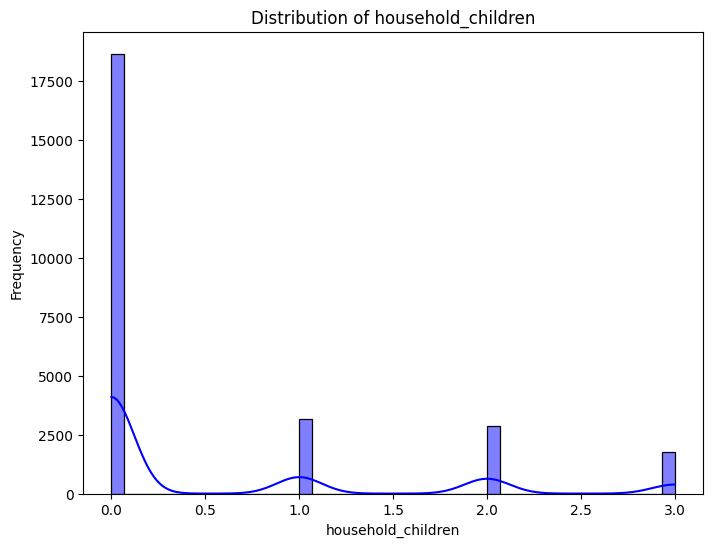

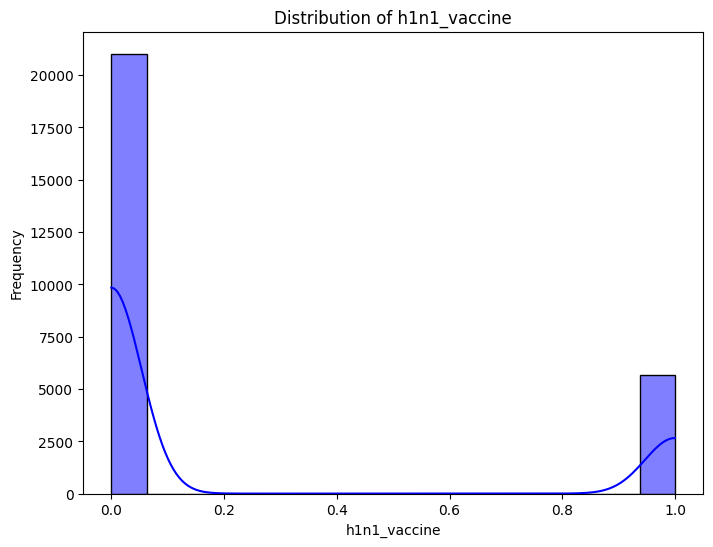

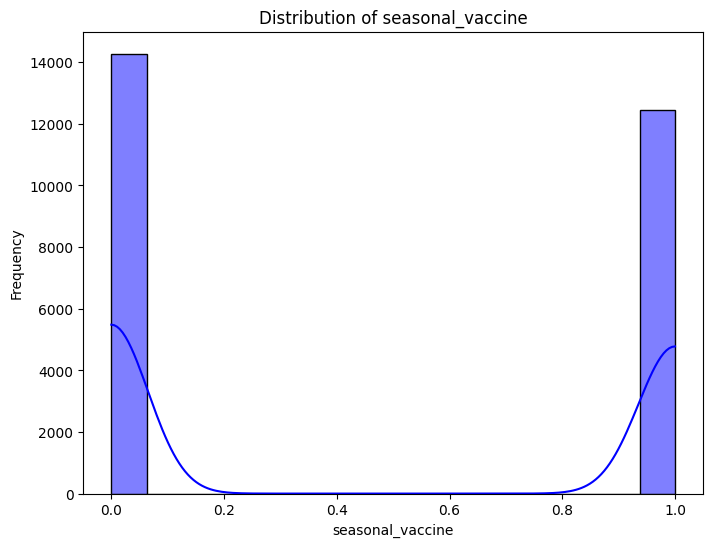

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


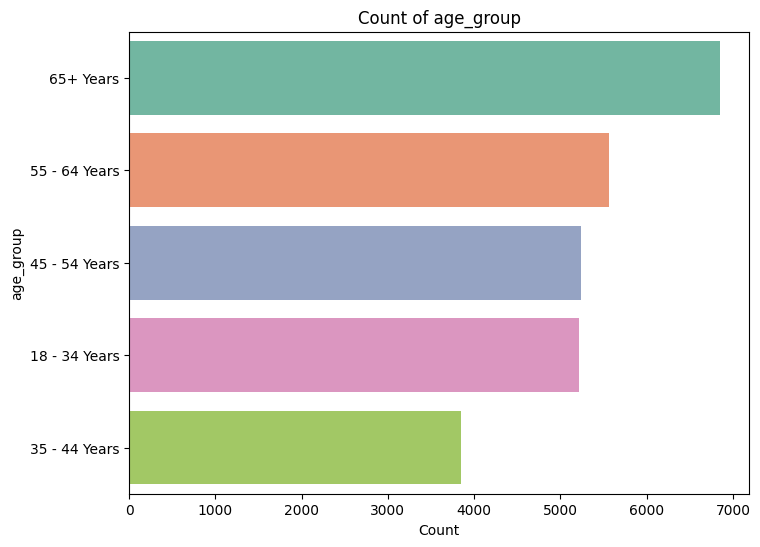

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


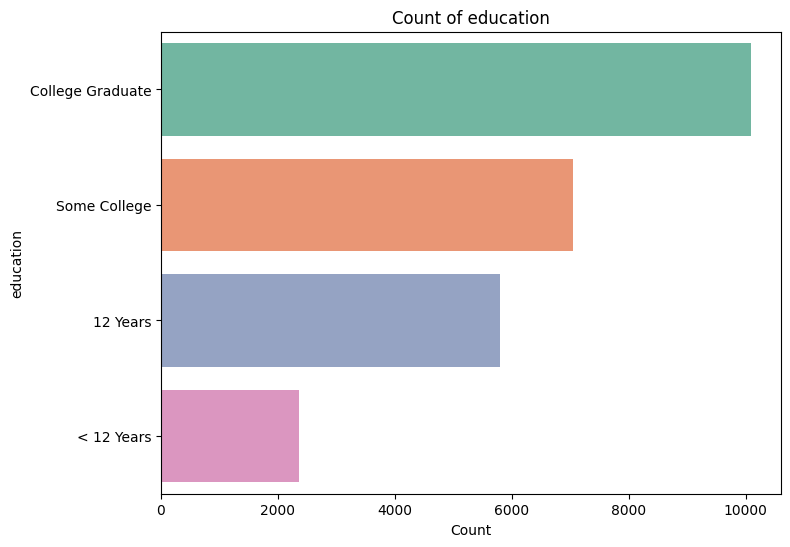

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


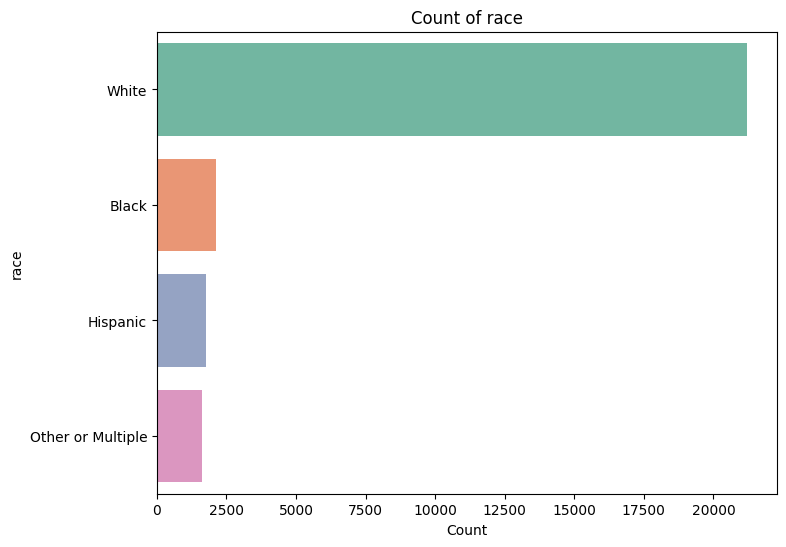

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


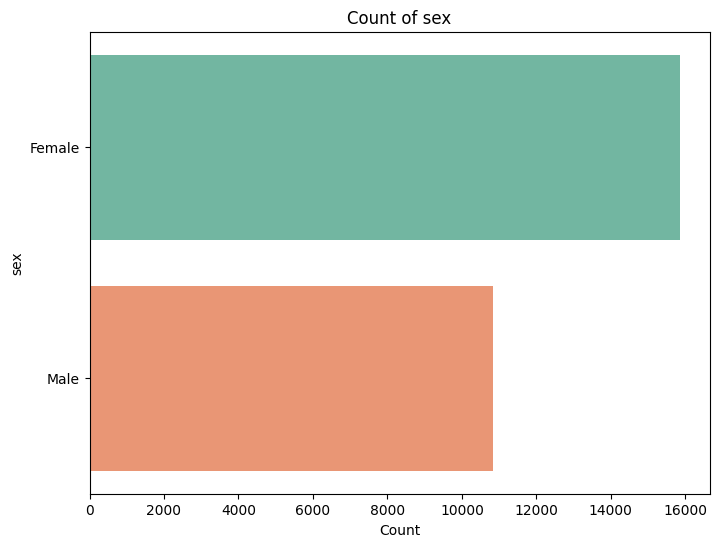

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


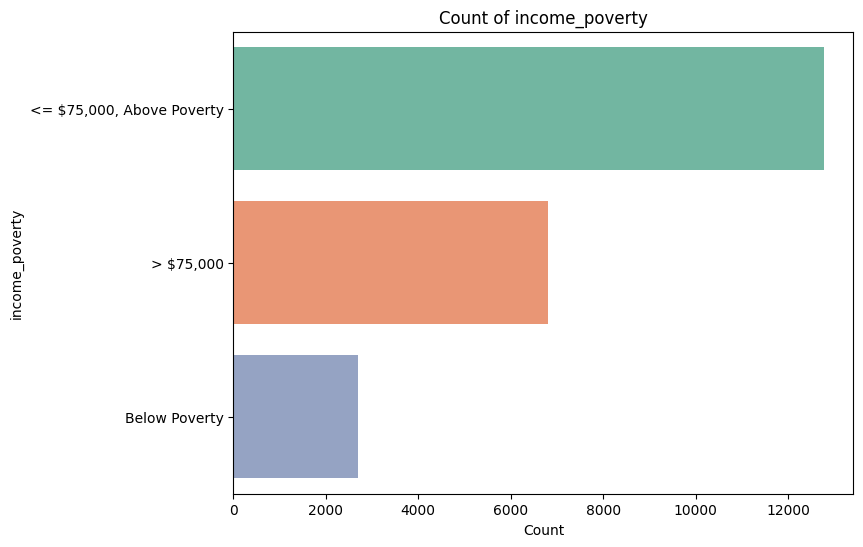

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


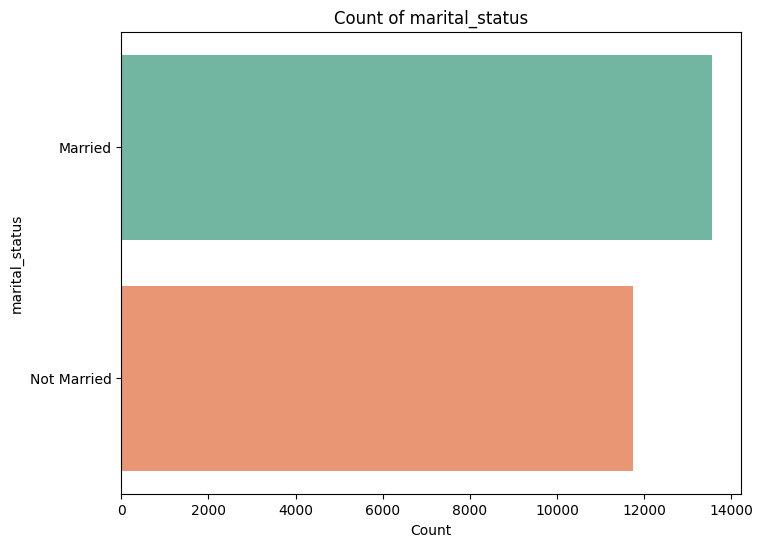

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


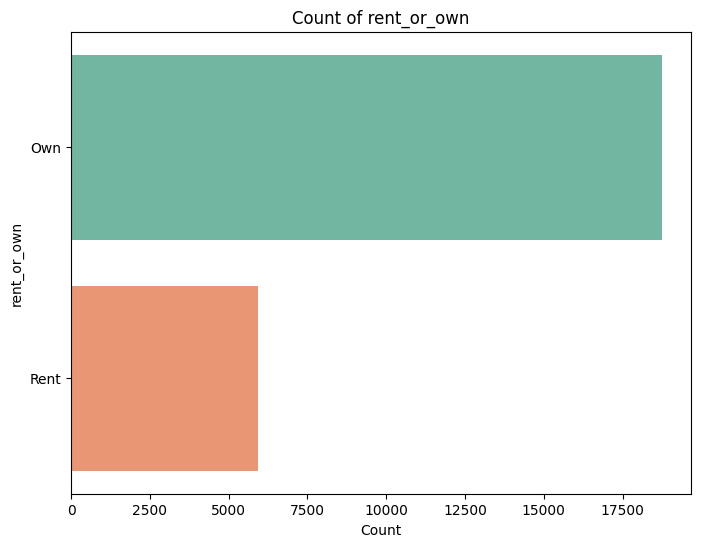

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


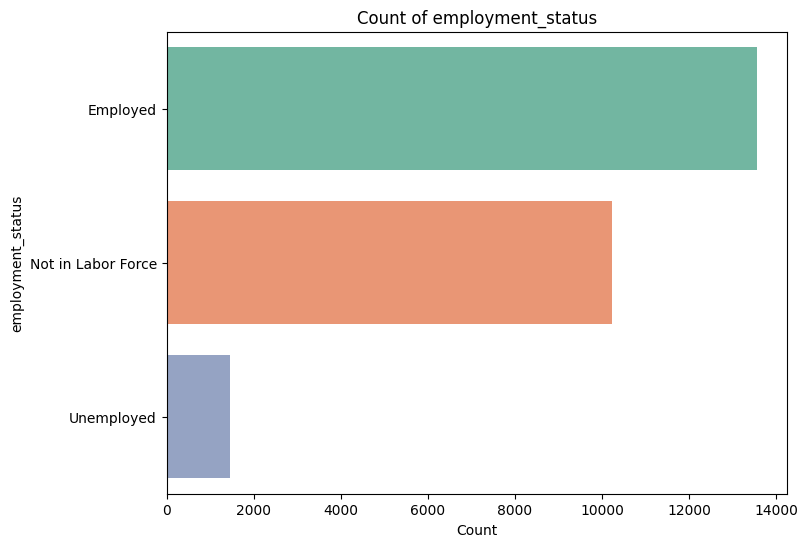

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


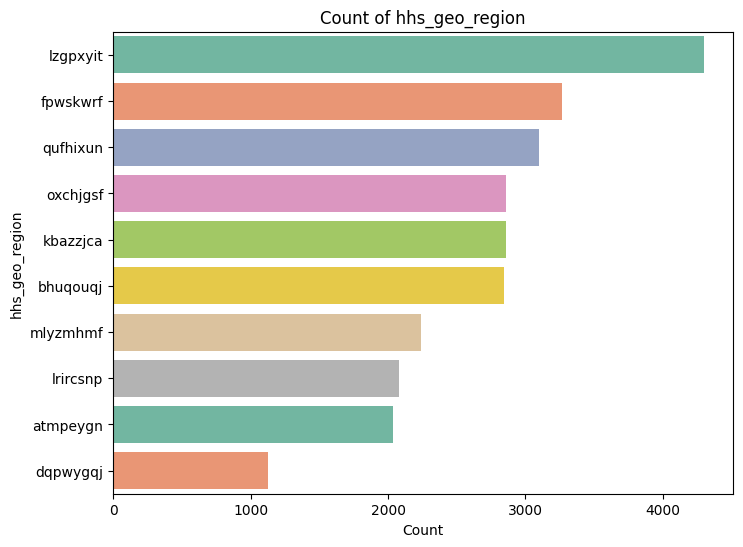

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


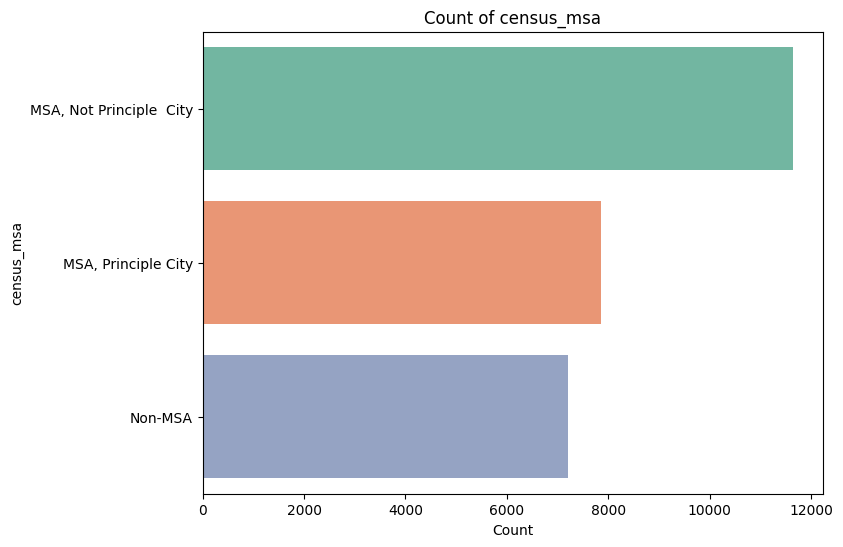

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


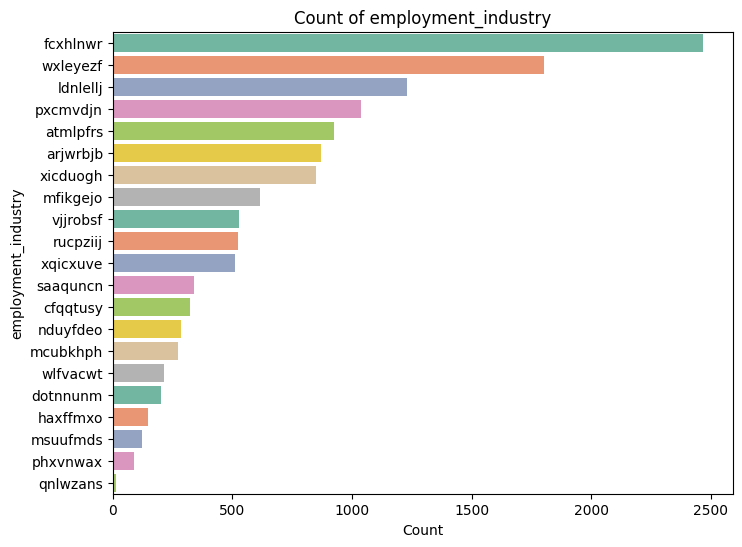

<ipython-input-9-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


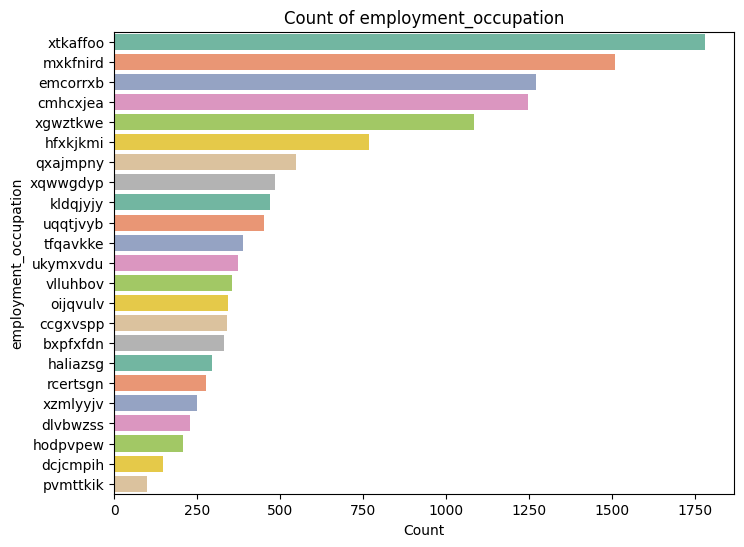

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

In [ ]:
df.drop("hhs_geo_region", axis=1, inplace=True)

In [ ]:
df.drop("employment_industry", axis=1, inplace=True)

In [ ]:
df.drop("employment_occupation", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
df["education"].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [ ]:
df["income_poverty"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [ ]:
df["employment_status"].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [ ]:
df["census_msa"].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Define the columns
one_hot_cols = ['age_group', 'race', 'sex', 'marital_status', 'rent_or_own']
ordinal_cols = ['education', 'income_poverty', 'employment_status', 'census_msa']
normalized_cols = [col for col in df.columns if col not in one_hot_cols and col not in ordinal_cols and col != 'h1n1_concern' and col != 'h1n1_knowledge']

# Pipeline for one_hot_cols
one_hot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for ordinal_cols
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
     ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'], ['Not in Labor Force', 'Unemployed', 'Employed'],
     ['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City']]))
])

# Pipeline for normalized_cols
normalized_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Pipeline for target_cols
target_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [ ]:
from sklearn.compose import ColumnTransformer

# Combine all pipelines into a single preprocessor
preprocessor = ColumnTransformer([
    ('target', target_pipeline, ['h1n1_concern', 'h1n1_knowledge']),
    ('one_hot', one_hot_pipeline, one_hot_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols),
    ('normalized', normalized_pipeline, normalized_cols),
])

In [ ]:
df_encoded = preprocessor.fit_transform(df)

In [ ]:
import pandas as pd

# Get unique categories for one-hot encoding
one_hot_categories = [df[col].unique() for col in one_hot_cols]

# Create one-hot feature names
one_hot_feature_names = []
for col, cats in zip(one_hot_cols, one_hot_categories):
    one_hot_feature_names.extend([f"{col}_{cat}" for cat in cats if not pd.isnull(cat)])
target_feature_names = ['h1n1_concern', 'h1n1_knowledge']
ordinal_feature_names = ordinal_cols
normalized_feature_names = normalized_cols

# Combine all feature names
feature_names = target_feature_names + one_hot_feature_names + ordinal_feature_names + normalized_feature_names

# Create DataFrame with processed data and appropriate column names
df_encoded = pd.DataFrame(df_encoded, columns=feature_names)

# Print the first few rows to verify
print(df_encoded.head())

   h1n1_concern  h1n1_knowledge  age_group_55 - 64 Years  \
0           1.0             0.0                      0.0   
1           3.0             2.0                      0.0   
2           1.0             1.0                      1.0   
3           1.0             1.0                      0.0   
4           2.0             1.0                      0.0   

   age_group_35 - 44 Years  age_group_18 - 34 Years  age_group_65+ Years  \
0                      0.0                      0.0                  1.0   
1                      1.0                      0.0                  0.0   
2                      0.0                      0.0                  0.0   
3                      0.0                      0.0                  0.0   
4                      0.0                      1.0                  0.0   

   age_group_45 - 54 Years  race_White  race_Black  race_Other or Multiple  \
0                      0.0         0.0         0.0                     0.0   
1                      0.0

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   age_group_55 - 64 Years      26707 non-null  float64
 3   age_group_35 - 44 Years      26707 non-null  float64
 4   age_group_18 - 34 Years      26707 non-null  float64
 5   age_group_65+ Years          26707 non-null  float64
 6   age_group_45 - 54 Years      26707 non-null  float64
 7   race_White                   26707 non-null  float64
 8   race_Black                   26707 non-null  float64
 9   race_Other or Multiple       26707 non-null  float64
 10  race_Hispanic                26707 non-null  float64
 11  sex_Female                   26707 non-null  float64
 12  sex_Male                     26707 non-null  float64
 13  marital_status_N

In [ ]:
df_encoded.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
age_group_55 - 64 Years        0
age_group_35 - 44 Years        0
age_group_18 - 34 Years        0
age_group_65+ Years            0
age_group_45 - 54 Years        0
race_White                     0
race_Black                     0
race_Other or Multiple         0
race_Hispanic                  0
sex_Female                     0
sex_Male                       0
marital_status_Not Married     0
marital_status_Married         0
rent_or_own_Own                0
rent_or_own_Rent               0
education                      0
income_poverty                 0
employment_status              0
census_msa                     0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_me

In [ ]:
df_encoded.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
age_group_55 - 64 Years        0
age_group_35 - 44 Years        0
age_group_18 - 34 Years        0
age_group_65+ Years            0
age_group_45 - 54 Years        0
race_White                     0
race_Black                     0
race_Other or Multiple         0
race_Hispanic                  0
sex_Female                     0
sex_Male                       0
marital_status_Not Married     0
marital_status_Married         0
rent_or_own_Own                0
rent_or_own_Rent               0
education                      0
income_poverty                 0
employment_status              0
census_msa                     0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_me

In [ ]:
X = df_encoded.drop(['h1n1_concern', 'h1n1_knowledge'], axis=1)
y = df_encoded[['h1n1_concern', 'h1n1_knowledge']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age_group_55 - 64 Years,age_group_35 - 44 Years,age_group_18 - 34 Years,age_group_65+ Years,age_group_45 - 54 Years,race_White,race_Black,race_Other or Multiple,race_Hispanic,sex_Female,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
24706,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.00,0.75,0.25,0.75,0.75,0.25,0.333333,0.000000,0.0,0.0
5393,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.00,0.75,0.75,1.00,0.75,0.75,0.000000,0.000000,0.0,1.0
20898,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.25,0.00,0.00,0.75,0.00,0.333333,0.333333,1.0,1.0
3429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.75,0.25,0.00,0.75,0.25,0.25,0.000000,0.000000,0.0,0.0
8731,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.50,0.25,1.00,1.00,0.25,1.00,0.333333,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.75,0.25,0.25,0.75,0.25,0.00,0.000000,0.000000,0.0,1.0
5390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.75,0.25,0.00,0.75,0.25,0.75,0.000000,0.000000,0.0,0.0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.75,0.25,0.25,0.75,0.25,0.25,0.333333,0.000000,0.0,0.0
15795,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.00,0.00,0.75,0.00,0.00,0.75,0.333333,0.000000,0.0,0.0


In [ ]:
y_train

,h1n1_concern,h1n1_knowledge
24706,2.0,1.0
5393,2.0,1.0
20898,0.0,1.0
3429,1.0,1.0
8731,1.0,0.0
...,...,...
21575,2.0,1.0
5390,1.0,1.0
860,2.0,1.0
15795,2.0,1.0


In [ ]:
import tensorflow as tf

# Create the DNN model with Functional API
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Hidden layers
hidden1 = tf.keras.layers.Dense(200, activation='relu')(input_layer)
hidden2 = tf.keras.layers.Dense(200, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(200, activation='relu')(hidden2)

# Output layer for 'h1n1_concern'
output_h1n1_concern = tf.keras.layers.Dense(4, activation='softmax', name='h1n1_concern')(hidden3)

# Output layer for 'h1n1_knowledge'
output_h1n1_knowledge = tf.keras.layers.Dense(3, activation='softmax', name='h1n1_knowledge')(hidden3)

# Combine input and output layers into a model
model_dnn_multoutput = tf.keras.Model(inputs=input_layer, outputs=[output_h1n1_concern, output_h1n1_knowledge])

# Compile the model
model_dnn_multoutput.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_dnn_multoutput = model_dnn_multoutput.fit(X_train, [y_train['h1n1_concern'], y_train['h1n1_knowledge']], epochs=100, validation_data=(X_test, [y_test['h1n1_concern'], y_test['h1n1_knowledge']]))


Epoch 1/100
668/668 [==============================] - 7s 7ms/step - loss: 1.9532 - h1n1_concern_loss: 1.1097 - h1n1_knowledge_loss: 0.8435 - h1n1_concern_accuracy: 0.4888 - h1n1_knowledge_accuracy: 0.5832 - val_loss: 1.9225 - val_h1n1_concern_loss: 1.0971 - val_h1n1_knowledge_loss: 0.8254 - val_h1n1_concern_accuracy: 0.5080 - val_h1n1_knowledge_accuracy: 0.5970
Epoch 2/100
668/668 [==============================] - 3s 5ms/step - loss: 1.8962 - h1n1_concern_loss: 1.0746 - h1n1_knowledge_loss: 0.8216 - h1n1_concern_accuracy: 0.5092 - h1n1_knowledge_accuracy: 0.5961 - val_loss: 1.9354 - val_h1n1_concern_loss: 1.1079 - val_h1n1_knowledge_loss: 0.8275 - val_h1n1_concern_accuracy: 0.5013 - val_h1n1_knowledge_accuracy: 0.6015
Epoch 3/100
668/668 [==============================] - 3s 5ms/step - loss: 1.8781 - h1n1_concern_loss: 1.0654 - h1n1_knowledge_loss: 0.8126 - h1n1_concern_accuracy: 0.5156 - h1n1_knowledge_accuracy: 0.6022 - val_loss: 1.9032 - val_h1n1_concern_loss: 1.0852 - val_h1n1_kn

In [ ]:
import tensorflow as tf

# Define input shape
input_shape = X_train.shape[1]

# Create the DNN model with Functional API
input_layer = tf.keras.layers.Input(shape=(input_shape,))

# Hidden layers
hidden1 = tf.keras.layers.Dense(256, activation='relu')(input_layer)
hidden1_dropout = tf.keras.layers.Dropout(0.3)(hidden1)  # Adding dropout for regularization
hidden2 = tf.keras.layers.Dense(128, activation='relu')(hidden1_dropout)
hidden2_dropout = tf.keras.layers.Dropout(0.3)(hidden2)  # Adding dropout for regularization
hidden3 = tf.keras.layers.Dense(64, activation='relu')(hidden2_dropout)
hidden3_dropout = tf.keras.layers.Dropout(0.3)(hidden3)  # Adding dropout for regularization

# Output layer for 'h1n1_concern'
output_h1n1_concern = tf.keras.layers.Dense(4, activation='softmax', name='h1n1_concern')(hidden3_dropout)

# Output layer for 'h1n1_knowledge'
output_h1n1_knowledge = tf.keras.layers.Dense(3, activation='softmax', name='h1n1_knowledge')(hidden3_dropout)

# Combine input and output layers into a model
model_dnn_multoutput2 = tf.keras.Model(inputs=input_layer, outputs=[output_h1n1_concern, output_h1n1_knowledge])

# Compile the model
model_dnn_multoutput2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_dnn_multoutput2.fit(X_train, [y_train['h1n1_concern'], y_train['h1n1_knowledge']], epochs=100, validation_data=(X_test, [y_test['h1n1_concern'], y_test['h1n1_knowledge']]))

Epoch 1/100
668/668 [==============================] - 5s 4ms/step - loss: 2.0503 - h1n1_concern_loss: 1.1703 - h1n1_knowledge_loss: 0.8800 - h1n1_concern_accuracy: 0.4557 - h1n1_knowledge_accuracy: 0.5668 - val_loss: 1.9363 - val_h1n1_concern_loss: 1.1042 - val_h1n1_knowledge_loss: 0.8321 - val_h1n1_concern_accuracy: 0.4968 - val_h1n1_knowledge_accuracy: 0.5942
Epoch 2/100
668/668 [==============================] - 3s 5ms/step - loss: 1.9654 - h1n1_concern_loss: 1.1191 - h1n1_knowledge_loss: 0.8463 - h1n1_concern_accuracy: 0.4885 - h1n1_knowledge_accuracy: 0.5844 - val_loss: 1.9358 - val_h1n1_concern_loss: 1.1007 - val_h1n1_knowledge_loss: 0.8351 - val_h1n1_concern_accuracy: 0.5139 - val_h1n1_knowledge_accuracy: 0.5945
Epoch 3/100
668/668 [==============================] - 3s 5ms/step - loss: 1.9423 - h1n1_concern_loss: 1.1029 - h1n1_knowledge_loss: 0.8394 - h1n1_concern_accuracy: 0.4993 - h1n1_knowledge_accuracy: 0.5906 - val_loss: 1.9254 - val_h1n1_concern_loss: 1.0942 - val_h1n1_kn

#Let's apply PCA:

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA to the training and test data
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define input shape after PCA
input_shape_after_pca = X_train_pca.shape[1]

# Create the DNN model with Functional API after PCA
input_layer_pca = tf.keras.layers.Input(shape=(input_shape_after_pca,))

# Hidden layers after PCA
hidden1_pca = tf.keras.layers.Dense(300, activation='relu')(input_layer_pca)
hidden1_dropout_pca = tf.keras.layers.Dropout(0.3)(hidden1_pca)
hidden2_pca = tf.keras.layers.Dense(300, activation='relu')(hidden1_dropout_pca)
hidden2_dropout_pca = tf.keras.layers.Dropout(0.3)(hidden2_pca)
hidden3_pca = tf.keras.layers.Dense(300, activation='relu')(hidden2_dropout_pca)
hidden3_dropout_pca = tf.keras.layers.Dropout(0.3)(hidden3_pca)

# Output layer for 'h1n1_concern' after PCA
output_h1n1_concern_pca = tf.keras.layers.Dense(4, activation='softmax', name='h1n1_concern')(hidden3_dropout_pca)

# Output layer for 'h1n1_knowledge' after PCA
output_h1n1_knowledge_pca = tf.keras.layers.Dense(3, activation='softmax', name='h1n1_knowledge')(hidden3_dropout_pca)

# Combine input and output layers into a model after PCA
model_dnn_multoutput_pca = tf.keras.Model(inputs=input_layer_pca, outputs=[output_h1n1_concern_pca, output_h1n1_knowledge_pca])

# Compile the model after PCA
model_dnn_multoutput_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model after PCA
model_dnn_multoutput_pca.fit(X_train_pca, [y_train['h1n1_concern'], y_train['h1n1_knowledge']], epochs=100, validation_data=(X_test_pca, [y_test['h1n1_concern'], y_test['h1n1_knowledge']]))

Epoch 1/100
668/668 [==============================] - 12s 14ms/step - loss: 1.9868 - h1n1_concern_loss: 1.1333 - h1n1_knowledge_loss: 0.8535 - h1n1_concern_accuracy: 0.4747 - h1n1_knowledge_accuracy: 0.5835 - val_loss: 1.9279 - val_h1n1_concern_loss: 1.0988 - val_h1n1_knowledge_loss: 0.8291 - val_h1n1_concern_accuracy: 0.5174 - val_h1n1_knowledge_accuracy: 0.5968
Epoch 2/100
668/668 [==============================] - 6s 9ms/step - loss: 1.9314 - h1n1_concern_loss: 1.1007 - h1n1_knowledge_loss: 0.8307 - h1n1_concern_accuracy: 0.4983 - h1n1_knowledge_accuracy: 0.5945 - val_loss: 1.9266 - val_h1n1_concern_loss: 1.0938 - val_h1n1_knowledge_loss: 0.8328 - val_h1n1_concern_accuracy: 0.5099 - val_h1n1_knowledge_accuracy: 0.5943
Epoch 3/100
668/668 [==============================] - 4s 7ms/step - loss: 1.9156 - h1n1_concern_loss: 1.0905 - h1n1_knowledge_loss: 0.8250 - h1n1_concern_accuracy: 0.5022 - h1n1_knowledge_accuracy: 0.5976 - val_loss: 1.9207 - val_h1n1_concern_loss: 1.0970 - val_h1n1_

In [58]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.001  # You can adjust this value as needed

# Create an Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Define input shape after PCA
input_shape_after_pca = X_train_pca.shape[1]

# Create the DNN model with Functional API after PCA
input_layer_pca = tf.keras.layers.Input(shape=(input_shape_after_pca,))

# Hidden layers after PCA
hidden1_pca = tf.keras.layers.Dense(100, activation='relu')(input_layer_pca)
hidden1_dropout_pca = tf.keras.layers.Dropout(0.3)(hidden1_pca)
hidden2_pca = tf.keras.layers.Dense(100, activation='relu')(hidden1_dropout_pca)
hidden2_dropout_pca = tf.keras.layers.Dropout(0.3)(hidden2_pca)
hidden3_pca = tf.keras.layers.Dense(100, activation='relu')(hidden2_dropout_pca)
hidden3_dropout_pca = tf.keras.layers.Dropout(0.3)(hidden3_pca)
hidden4_pca = tf.keras.layers.Dense(100, activation='relu')(hidden3_dropout_pca)
hidden4_dropout_pca = tf.keras.layers.Dropout(0.3)(hidden4_pca)

# Output layer for 'h1n1_concern' after PCA
output_h1n1_concern_pca = tf.keras.layers.Dense(4, activation='softmax', name='h1n1_concern')(hidden3_dropout_pca)

# Output layer for 'h1n1_knowledge' after PCA
output_h1n1_knowledge_pca = tf.keras.layers.Dense(3, activation='softmax', name='h1n1_knowledge')(hidden3_dropout_pca)

# Combine input and output layers into a model after PCA
model_dnn_multoutput_pca = tf.keras.Model(inputs=input_layer_pca, outputs=[output_h1n1_concern_pca, output_h1n1_knowledge_pca])

# Compile the model after PCA
model_dnn_multoutput_pca.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model after PCA
model_dnn_multoutput_pca.fit(X_train_pca, [y_train['h1n1_concern'], y_train['h1n1_knowledge']], epochs=50, validation_data=(X_test_pca, [y_test['h1n1_concern'], y_test['h1n1_knowledge']]))

Epoch 1/50


Exception ignored in: <function _xla_gc_callback at 0x7f01e2fb3e20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


668/668 [==============================] - 85s 4ms/step - loss: 2.0535 - h1n1_concern_loss: 1.1789 - h1n1_knowledge_loss: 0.8746 - h1n1_concern_accuracy: 0.4494 - h1n1_knowledge_accuracy: 0.5682 - val_loss: 1.9512 - val_h1n1_concern_loss: 1.1131 - val_h1n1_knowledge_loss: 0.8381 - val_h1n1_concern_accuracy: 0.5009 - val_h1n1_knowledge_accuracy: 0.5861
Epoch 2/50
668/668 [==============================] - 4s 6ms/step - loss: 1.9635 - h1n1_concern_loss: 1.1197 - h1n1_knowledge_loss: 0.8439 - h1n1_concern_accuracy: 0.4880 - h1n1_knowledge_accuracy: 0.5881 - val_loss: 1.9234 - val_h1n1_concern_loss: 1.0967 - val_h1n1_knowledge_loss: 0.8266 - val_h1n1_concern_accuracy: 0.5071 - val_h1n1_knowledge_accuracy: 0.5953
Epoch 3/50
668/668 [==============================] - 3s 4ms/step - loss: 1.9444 - h1n1_concern_loss: 1.1091 - h1n1_knowledge_loss: 0.8353 - h1n1_concern_accuracy: 0.4923 - h1n1_knowledge_accuracy: 0.5908 - val_loss: 1.9174 - val_h1n1_concern_loss: 1.0940 - val_h1n1_knowledge_loss: